In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

Based on Uri Alon's youtube course on systems biology https://www.youtube.com/watch?v=Z__BHVFP0Lk&list=PL775875BB77651029


Course premise: Biological systems can be understood in terms of principles "design principles" that unify different systems in a mathematical framework.

# Lecture 1

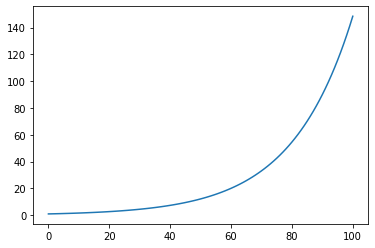

In [13]:
#useful scipy tutorial https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html
#Also the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
def func(y,t,params):
    x=y
    alpha=params
    dydt=alpha*x
    return dydt
    
alpha=0.5
y0=1
t = np.linspace(0, 10, 101)
soln=odeint(func, y0, t, args=(alpha,))

plt.plot(soln)


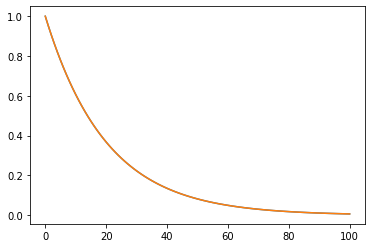

In [14]:
alpha=-0.5
y0=1
t = np.linspace(0, 10, 101)
soln=odeint(func, y0, t, args=(alpha,))

plt.plot(soln)

plt.plot(soln)

How do cells think?

A cell represents the environment using about 300 internal degrees of freedom via transcription factors.

There are around 4000 genes of the E. coli that make proteins. There's about 10**6 number of molecules in a cell. It follows that there are about 1000 molecular copies of each protein.

Environmental signals affect regulatory proteins called transcription factors.

The parts of the genomic sequence that regulates genes is called the promoter.

E. Coli has a transcription network with about 300 transcription factors and about 10000 arrows. This is the brain of the cell.


x->y

Calculate the dynamics of the concentration of Y, e.g. its dynamics.

X* is the concentration of the transcription factor. 

$\beta(X*)$->production rate

$\alpha$-> removal rate

$$\frac{dY}{dt}=\beta(X*)-\alpha Y$$

$$\alpha=\alpha_{degradation}-\alpha_{dilution}$$

Separation of timescales on the beta! Change in transcription factor concentration leads to an immediate change of $\beta$

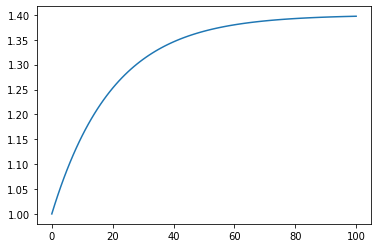

In [5]:
def change_in_cons(y,t,alpha,beta):
    x=y
    dydt=beta-alpha*x
    return dydt
    
alpha=0.5
y0=1
t = np.linspace(0, 10, 101)
beta=0.7
soln=odeint(change_in_cons, y0, t, args=(alpha,beta))
plt.plot(soln)

1. Steady state solution--> $Y=\frac{\beta}{\alpha}$
2. Beta suddenly becomes zero--> Exponential decay to 0
3. Beta suddenly increases (transient)--> Exponential approach to steady state

Response time $\frac{log(2)}{\alpha_{dilution}}$
<--Time to reach half-way between initial and final levels

# Lecture 2

How does negative auto-regulation speed up response times?

Response time-- time to reach half-way between initial and final levels.
$$t_{\frac{1}{2}}=\frac{log{(2)}}{\alpha}$$

To increase response time one strategy is to remove proteins faster e.g. increase $\alpha$.
To keep $Y_{st}$ we then need to make more proteins faster by increasing $\beta$.
This is a futile cycle of making-breaking proteins. Bacteria don't use this strategy.

How can we speed up the responses ($t_{\frac{1}{2}}$) given a certain steady state without making and breaking proteins?

Network motifs-- patterns that appear in the transcription networks more often than would be expected at random.

Auto-regulating pattern-- a transcription factor that regulates its own production.

In a real E.coli transcription network 40% of nodes have auto-regulation. Mostly auto-repression, negative auto-regulation.

Compare real networks to random networks to figure out which connectivity patterns are surprising. In an E. Coli network with N=400 nodes and E=500 edges randomly distribute the edges among the nodes. 

$$P_{self}=\frac{1}{N}$$
$$<N_{s}>=E\frac{1}{N}=1.2\pm \sqrt{1.2}=1.1$$

The actual number of autoregulating network motifs is more than 30 standard deviations away from the random prediction.

Auto-regulation in equations:
$$\frac{dY}{dt}=\beta(Y)-\alpha Y$$

$\beta$ is now a decreasing function of the concentration of $Y$.

Usually regulatory functions $\beta$ have shapes called Hill functions.

$$\beta(Y)=\frac{\beta_{m}}{1+(\frac{Y}{k})^n}$$
$\beta_{m}$ is the maximum production rate (varies from cell to cell by about 30%, production rate is noisy), $k$ is the halfway point (concentration of Y needed for chemical repression, chemical bonds between Y and its DNA site, hardwired for cells of same type if there are no mutations) and steepness is governed by $n$ which is called the Hill coefficient.

This is an equation for a repressor. For an activator the Hill coefficient is governed by:

$$\beta(Y)=\frac{\beta_{m}(\frac{Y}{k})^n}{1+(\frac{Y}{k})^n}$$

You can again use the separation of timescales.

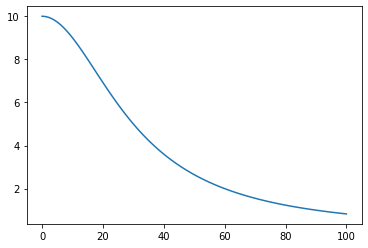

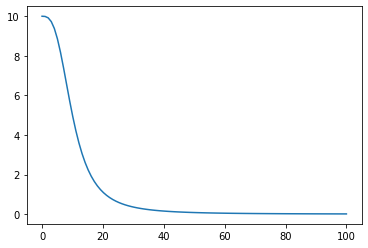

array([1.00000000e+01, 9.98970451e+00, 9.91822541e+00, 9.72926875e+00,
       9.38122342e+00, 8.85875912e+00, 8.17921114e+00, 7.38825660e+00,
       6.54590606e+00, 5.70999571e+00, 4.92462819e+00, 4.21631001e+00,
       3.59596546e+00, 3.06349037e+00, 2.61233412e+00, 2.23298558e+00,
       1.91520279e+00, 1.64924305e+00, 1.42642804e+00, 1.23931785e+00,
       1.08167966e+00, 9.48363448e-01, 8.35147210e-01, 7.38583327e-01,
       6.55860072e-01, 5.84683048e-01, 5.23176619e-01, 4.69803396e-01,
       4.23299164e-01, 3.82620592e-01, 3.46903335e-01, 3.15428487e-01,
       2.87595708e-01, 2.62901655e-01, 2.40922629e-01, 2.21300578e-01,
       2.03731766e-01, 1.87957573e-01, 1.73756994e-01, 1.60940501e-01,
       1.49345011e-01, 1.38829728e-01, 1.29272714e-01, 1.20568037e-01,
       1.12623399e-01, 1.05358146e-01, 9.87016102e-02, 9.25917028e-02,
       8.69737365e-02, 8.17994212e-02, 7.70260139e-02, 7.26155940e-02,
       6.85344440e-02, 6.47525185e-02, 6.12429888e-02, 5.79818499e-02,
      

In [4]:
#plotting Hill function

def HillFunction(beta_m,k,n):
    Y=np.linspace(0,100,100)
    beta_Y=beta_m/(1+(Y/k)**n)
    plt.plot(Y,beta_Y)
    plt.show()
    return beta_Y

HillFunction(10,30,2)
HillFunction(10,10,3)
